<a href="https://colab.research.google.com/github/MaryMbugua109/MaryMbugua109/blob/main/MaryMbuguaNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Analysis with Python

##1.0 Importing our libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##1.10 Data Cleaning

In [23]:
#Loading our dataset
Finance_data=pd.read_csv('http://bit.ly/FinancialDataset')
Finance_data
#Previwing the first 5 rows of our dataset
Finance_data.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


###(a)Missing Values

In [24]:
#Checking how many missing values we have accross each column
Finance_data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [25]:
#Dropping all the missing values
Finance=Finance_data.dropna()

In [26]:
#Confirming that we no longer have missing values
print(Finance.isnull().sum())

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64


###(b)Duplicates

In [27]:
#Checking for duplicates
Finance.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23343, dtype: bool

In [28]:
#Drop duplicates
Finance.drop_duplicates()
Finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


###(c)Dropping Unnecessary columns

In [29]:
Finance.drop(['uniqueid','The relathip with head','marital_status','year'],axis=1,inplace=True)
Finance

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,Yes,4.0,48.0,Female,No formal education,Other Income
23520,Uganda,No,Rural,Yes,2.0,27.0,Female,Secondary education,Other Income
23521,Uganda,No,Rural,Yes,5.0,27.0,Female,Primary education,Other Income
23522,Uganda,No,Urban,Yes,7.0,30.0,Female,Secondary education,Self employed


###(d)Removing white spaces

In [30]:
#Removing white spaces
Finance.columns=Finance.columns.str.strip().str.replace(' ','_')
Finance.columns


Index(['country', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'Level_of_Educuation', 'Type_of_Job'],
      dtype='object')

###(e)Saving the cleaned dataset

In [31]:
Finance

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,Level_of_Educuation,Type_of_Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,Yes,4.0,48.0,Female,No formal education,Other Income
23520,Uganda,No,Rural,Yes,2.0,27.0,Female,Secondary education,Other Income
23521,Uganda,No,Rural,Yes,5.0,27.0,Female,Primary education,Other Income
23522,Uganda,No,Urban,Yes,7.0,30.0,Female,Secondary education,Self employed


##2.0Measures of Central Tendency

###(a)Mean

In [10]:
#Finding the mean of the respondent age
Finance['Respondent_Age'].mean()
#The respondent mean age is 39 years

38.80550914621085

###(b)Median

In [11]:
#Finding the median age of the respondents
Finance['Respondent_Age'].median()
#The median age of the respondents is 35years

35.0

###(c)Mode

In [12]:
#Finding the mode for the respondents age
Finance['Respondent_Age'].mode()
#The mode is 30 years

0    30.0
dtype: float64

##3.0Measures of Variability

###(a)Standard Deviation

In [13]:
#Finding the standard deviation of the respondents age
Finance['Respondent_Age'].std()
#This indacates that the average distance between the age and mean is 16.5

16.51980349804178

###(b)Variance

In [14]:
Finance['household_size'].var()

5.20379827489179

###(c)Range

In [15]:
Finance_max=Finance['household_size'].max()
Finance_min=Finance['household_size'].min()
Finance_max-Finance_min
#The range basically shows the difference betwen the highest household size and the 
#smallest household size




21.0

###(d)Quantiles

In [ ]:
#Finding the quantiles of the respondents age
Finance['Respondent_Age'].quantile([0.25,0.50,0.75])
 #First quartile value is at 25 percentile. 
# Second quartile is 50 percentile and third quartile is 75 percentile. 


0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent_Age, dtype: float64

###(e)Skewness

In [ ]:
#Skewness is basically the measure of symmetry of a probablity distribution
Finance['household_size)
#This shows that household size data is positively skewed

0.9741086837897069

###(f)Kurtosis

In [ ]:
#Kurtosis is a measure of wether the data is heavy tailed or light tailed in relation to anormal distribution
Finance['Respondent_Age'].kurt()
#This indicates that the sample Respondent age kurtosis is zero. Hence if plotted, it will be a normal distribution

0.09844652254807196

In [ ]:
Finance['Respondent_Age'].describe()

count    23343.000000
mean        38.805509
std         16.519803
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent_Age, dtype: float64

##4.0Visualization Techniques

###(a)Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


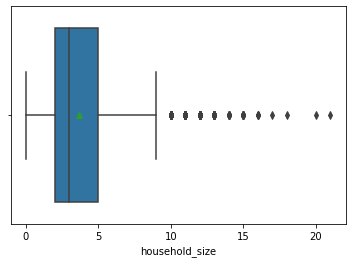

In [ ]:
sns.boxplot(Finance['household_size'],showmeans=True)
#With our plot wecan easily tell the “minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”. 
# It can tell you us our outliers and what their values are

###(b)Histogram 


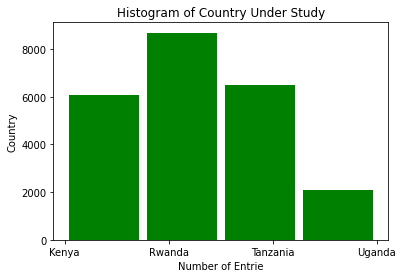

In [ ]:
country_name=Finance['country']
plt.hist(country_name, bins=4, histtype='bar', rwidth=0.9,color='green')
plt.xlabel('Number of Entrie')
plt.ylabel('Country')
plt.title('Histogram of Country Under Study')
plt.show()


###(Recommedations)
1.Reduce the number of outliers in the household size column.

2.The variance for the respondents age is too big.

3.The range also for the household size column is unrealistic.

#BIVARIATE ANALYSIS

In [32]:
#Determining the number of records in our dataset
Finance.shape

(23343, 9)

In [33]:
# Checking whether each column has an appropriate datatype
Finance.dtypes

country                  object
Has_a_Bank_account       object
Type_of_Location         object
Cell_Phone_Access        object
household_size          float64
Respondent_Age          float64
gender_of_respondent     object
Level_of_Educuation      object
Type_of_Job              object
dtype: object

In [34]:
#Converting country column to integer
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#Assigning numerical values and storing in another column called country1
Finance['Country']=labelencoder.fit_transform(Finance['country'])
Finance['has_a_bank_account']=labelencoder.fit_transform(Finance['Has_a_Bank_account'])
Finance['type_of_location']=labelencoder.fit_transform(Finance['Type_of_Location'])
Finance['level_of_education']=labelencoder.fit_transform(Finance['Level_of_Educuation'])
Finance['gender']=labelencoder.fit_transform(Finance['gender_of_respondent'])
Finance['cell_phone_access']=labelencoder.fit_transform(Finance['Cell_Phone_Access'])

Finance.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

country                  object
Has_a_Bank_account       object
Type_of_Location         object
Cell_Phone_Access        object
household_size          float64
Respondent_Age          float64
gender_of_respondent     object
Level_of_Educuation      object
Type_of_Job              object
Country                   int64
has_a_bank_account        int64
type_of_location          int64
level_of_education        int64
gender                    int64
cell_phone_access         int64
dtype: object

In [36]:
Finance.drop(['Level_of_Educuation','Has_a_Bank_account','Type_of_Location','country'],axis=1,inplace=True)
Finance

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,Type_of_Job,Country,has_a_bank_account,type_of_location,level_of_education,gender,cell_phone_access
0,Yes,3.0,24.0,Female,Self employed,0,1,0,4,0,1
1,No,5.0,70.0,Female,Government Dependent,0,0,0,1,0,0
2,Yes,5.0,26.0,Male,Self employed,0,1,1,6,1,1
3,Yes,5.0,34.0,Female,Formally employed Private,0,0,0,3,0,1
4,No,8.0,26.0,Male,Informally employed,0,0,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
23519,Yes,4.0,48.0,Female,Other Income,3,0,0,1,0,1
23520,Yes,2.0,27.0,Female,Other Income,3,0,0,4,0,1
23521,Yes,5.0,27.0,Female,Other Income,3,0,0,3,0,1
23522,Yes,7.0,30.0,Female,Self employed,3,0,1,4,0,1


###Creating Visualizations


###2.1 Scatter Plots

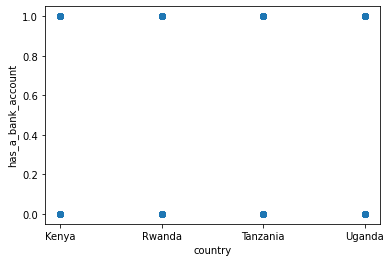

In [ ]:
sns.regplot(x = Finance["country"], y = Finance['has_a_bank_account'], fit_reg=False)
#We can see that there's no correlation between a country and them having a bank account

###2.2Line Charts

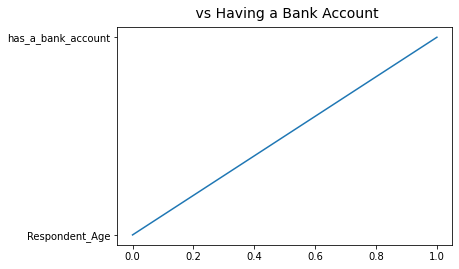

In [ ]:
#Plotting a linegraph toshow the relationship between respondents age and 
#the probability of having a bank account
plt.plot(['Respondent_Age','has_a_bank_account'])
plt.title(" vs Having a Bank Account", fontsize=14, y=1.015)

# Displaying our graph
plt.show()
#This indicates that the two variables are directly propotional.

###2.3 Correlation

In [ ]:
# Calculating the pearson coefficient
pearson_coeff = Finance["has_a_bank_account"].corr(Finance["level_of_education"], method="pearson") 
print(pearson_coeff)
#This means that theres a weak correlation between the two variables since the pearson correlation
#coefficient is 0.32 


0.3229399496572029


###RECOMMEDATIONS
1.Reduce the high levels of multicolinearity.

2.Convert the column variables to integer using label encoder.


#MULTIVARIATE ANALYSIS

###(a)Multiple Regression

In [34]:
#Multiple regression to find the relationship between the type of location and cellphone
#access and having  a bank account
from sklearn import linear_model
X = Finance[['type_of_location', 'cell_phone_access']]
y = Finance['has_a_bank_account']
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
predicted = regr.predict([[False, True]])
predicted
#This indicates that there's a weak correlation between the variables


array([0.15631036])

In [14]:
#Let's us try and find out if thers's a correlation between 
from sklearn import linear_model
X = Finance[['Country', 'cell_phone_access']]
y = Finance['has_a_bank_account']
regr = linear_model.LinearRegression()
regr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
predicted = regr.predict([[True, False]])
predicted
#This simple indicates that theres no relationship/correlation between a country,cell phone access
#and having a bank account

array([0.03890993])

###(b)Reduction Techniques

###(i)Linear Discriminant Analysis

In [40]:
Finance.dtypes

household_size        float64
Respondent_Age        float64
Country                 int64
has_a_bank_account      int64
type_of_location        int64
level_of_education      int64
gender                  int64
cell_phone_access       int64
dtype: object

In [41]:
#Checking the size of our dataset
Finance.shape

(23343, 8)

In [43]:
#Step1.Dividing the dataset into feature set and corresponding labels
X = Finance.iloc[:, 0:6].values
y = Finance.iloc[:, 6].values

In [44]:
#Step2:Dividing the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
# Step 3: Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
#step4:LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [47]:
#Step5:Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [48]:
#Step6:Evaluating the performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
#the algorithm achieved an accuracy of 60%

[[2327  420]
 [1453  469]]
Accuracy0.5988434354251446


###Recommedations
1.Transform the variables to reduce the high correlation/variance between  them.

#EXPLORATORY DATA ANALYSIS AND DOCUMENTATION

##(a)Defining the question
The  finance manager would like to know whether a certain data collected in the EA region can be used to scale up the company financial services to their customers.  I applied Linear Discriminant analysis while developing my model.

###(b)Defining the Metric of Success
The metric of success using LDA is 59.8%

###(c)Understanding the Context
LDA-Linear Discriminant Analysis

###(d)Recording the Experimental Design
The experimental design used is Independent Measures.

###(e)Data Relevance
The data is relevant since it answers most of the questions  with a metric of success of 60%

##2.Outliers,missing data,anomalies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

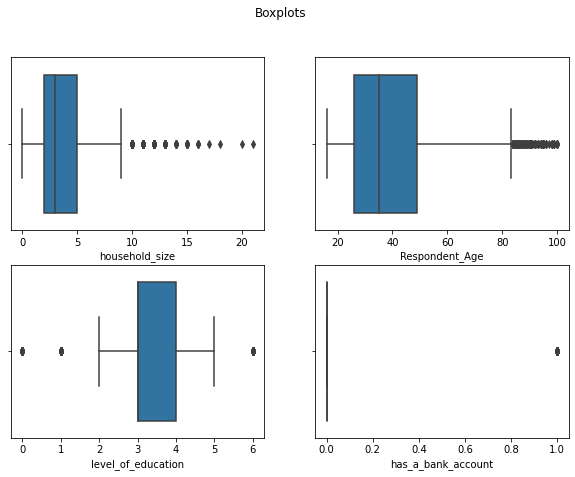

In [52]:
#Checking for outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(Finance['household_size'], ax=ax1)
sns.boxplot(Finance['Respondent_Age'], ax=ax2)
sns.boxplot(Finance['level_of_education'], ax=ax3)
sns.boxplot(Finance['has_a_bank_account'], ax=ax4)
plt.show()


In [56]:
#Checking for anomalies
q1_30 = Finance['Respondent_Age'].quantile(.25)
q3_30 = Finance['Respondent_Age'].quantile(.75)

iqr_30 = q3_30 - q1_30


q1_64 = Finance['has_a_bank_account'].quantile(.25)
q3_64 = Finance['has_a_bank_account'].quantile(.75)

iqr_64 = q3_64 - q1_64

q1_1 = Finance['cell_phone_access'].quantile(.25)
q3_1 = Finance['cell_phone_access'].quantile(.75)

iqr_1 = q3_1 - q1_1

q1_11 = Finance['level_of_education'].quantile(.25)
q3_11 = Finance['level_of_education'].quantile(.75)

iqr_11 = q3_11 - q1_11
print(iqr_30, iqr)

23.0 3.0


In [57]:
#Identifying how many missing data we have accross each column
Finance.isnull().any()

household_size        False
Respondent_Age        False
Country               False
has_a_bank_account    False
type_of_location      False
level_of_education    False
gender                False
cell_phone_access     False
dtype: bool

In [58]:
#More data cleaning procedures
Finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   household_size      23343 non-null  float64
 1   Respondent_Age      23343 non-null  float64
 2   Country             23343 non-null  int64  
 3   has_a_bank_account  23343 non-null  int64  
 4   type_of_location    23343 non-null  int64  
 5   level_of_education  23343 non-null  int64  
 6   gender              23343 non-null  int64  
 7   cell_phone_access   23343 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.2 MB


##3.Challenging the solution
The solutions obtained in my analysis can differ if different variables are used.
Therefore,perhaps with different variables in LDA we can achieve a higher metric of success.